# Trabajo final Machine Learning

Manuel de Prado

Alejandro Escribano

The provided dataset consists of data from third year undergraduate students of the
Medical School at the University of Navarra. Several features, including basic data such
as age and sex, as well as metrics known to affect the development of Miopia are provided
for each student

## Lectura y carga de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
%config IPCompleter.greedy=True #comando para que las graficas nos queden al lado de la celda

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#Lectura del dataset de X_train
X_train_og = pd.read_csv("/content/drive/MyDrive/ML/Trabajo_final/X_train.csv")
X_train = X_train_og.copy()
X_train.head()


,fecha,edad,sexo,origen antepasados (españa),origen antepasados (extranjeros),hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,...,OS-DS,CUVAF-Total,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Suma Nasal,Promedio Temporal,DE Temporal,Suma Temporal
0,2/11/20,22,Mujer,Asturias,NaN,0.0,0.0,4.0,4.0,40,...,0.238059,2.256667,0.564167,0.842300,0.905000,1.279863,1.810000,0.223333,0.160278,0.446667
1,2/17/20,23,Mujer,Navarra,NaN,5.0,2.0,2.0,9.0,20,...,2.585654,8.026667,2.006667,1.887316,3.620833,0.503224,7.241667,0.392500,0.102530,0.785000
2,3/10/20,22,Mujer,Bizkaia,NaN,2.0,3.0,8.0,13.0,30,...,0.431335,12.710000,3.177500,0.743668,3.152500,1.248043,6.305000,3.202500,0.314663,6.405000
3,2/26/20,22,Mujer,"Navarra, Extremadura, Cataluña, Aragón",España,0.0,2.0,13.0,15.0,54,...,0.626968,3.551667,0.887917,0.877145,1.003333,1.418928,2.006667,0.772500,0.491439,1.545000
4,2/19/20,23,Mujer,Toledo,NaN,3.0,0.0,0.0,3.0,56,...,1.269257,1.795000,0.448750,0.897500,0.897500,1.269257,1.795000,0.000000,0.000000,0.000000


In [4]:
#Lectura del dataset de Y_train
Y_train_og = pd.read_csv("/content/drive/MyDrive/ML/Trabajo_final/Y_train.csv")
Y_train = Y_train_og.copy()
Y_train.head()

,M,MM,Combo,DCombo
0,SI,SI,MM,MM
1,SI,NO,M,M1
2,NO,NO,C,C
3,NO,NO,C,C
4,NO,NO,C,C


In [5]:
#Lectura del dataset de X_test
X_test=pd.read_csv("/content/drive/MyDrive/ML/Trabajo_final/X_test.csv")
X_test.head()

,fecha,edad,sexo,origen antepasados (españa),origen antepasados (extranjeros),hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,...,OS-DS,CUVAF-Total,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Suma Nasal,Promedio Temporal,DE Temporal,Suma Temporal
0,2/24/20,21,Hombre,Murcia,Murcia y norte de Italia,4.0,0.0,0,4.0,25,...,3.949191,28.075000,0.018750,3.950612,8.080833,6.341569,16.161667,5.956667,1.447212,11.913333
1,2/18/20,22,Hombre,Burgos,NaN,6.0,2.0,1,9.0,45,...,0.473762,5.325000,1.331250,1.519037,0.295000,0.417193,0.590000,2.367500,1.566242,4.735000
2,2/18/20,23,Mujer,Navarra,NaN,5.0,1.0,0,6.0,55,...,0.956951,3.206667,0.801667,0.947924,1.603333,0.353553,3.206667,0.000000,0.000000,0.000000
3,2/11/20,22,Mujer,Alava,NaN,3.0,3.0,5,11.0,40,...,4.247355,21.396667,5.349167,2.659806,3.448333,0.582185,6.896667,7.250000,2.536156,14.500000
4,2/25/20,21,Mujer,Guipúzcoa y Madrid,España,3.0,3.0,4,10.0,0,...,0.304056,1.186667,0.296667,0.367605,0.593333,0.230988,1.186667,0.000000,0.000000,0.000000


With the provided the data the goal is to make three types of predictions:
- Binary classification to predict whether a student has myopia (M) or not. This is
encoded in column M, with labels YES and NO.
- Binary classification to predict whether a student has myopia magna (MM) or not.
This is encoded in column MM, with labels YES and NO.
- Multi-Label classification, to combine both previous columns into one, denoted
as ‘COMBO’, where a student is classified as M (myopia), MM (myopia magna),
or C (control or no myopia).
- Multi-Label classification, specified in column ‘DCOMBO’, where myopia
students are further classified as type M1 or M2.


Note that the labels for the test set are not provided. Four labels should be provided for
each student specified in the test file.

##Exploracion inicial y limpieza de datos

### Labels

In [6]:
#Distribución de clases
for col in Y_train.columns:
    print(f"\nDistribución de {col}:")
    print(Y_train[col].value_counts())


Distribución de M:
M
SI    88
NO    44
Name: count, dtype: int64

Distribución de MM:
MM
NO    122
SI     10
Name: count, dtype: int64

Distribución de Combo:
Combo
M     70
C     44
MM    18
Name: count, dtype: int64

Distribución de DCombo:
DCombo
C     44
M1    39
M2    31
MM    18
Name: count, dtype: int64


En las distribuciones ya se ve como a primera vista no salen los calculos en la distribucion de "Combo", ya que hay 18 filas con MM y solo 10 filas en la distribucion de "MM" con miopia magna. Por lo tanto, se comprueba posibles incoherencias a la hora de la clasificacion en cada uno de los labels

In [7]:
#Comprobacion de que todos los que tienen miopia magna, tienen miopia
incoherentes = Y_train[
    (Y_train["MM"] == "SI") & (Y_train["M"] == "NO")
]

print(f"Casos incoherentes: {len(incoherentes)}")
display(incoherentes)

Casos incoherentes: 0


,M,MM,Combo,DCombo


In [8]:
#Comprobacion tambien de que en Combo los que presenten MM tambien tengan en MM y M el SI.
errores_combo = Y_train[
    ((Y_train["Combo"] == "MM") & (Y_train["MM"] != "SI")) |
    ((Y_train["Combo"] == "M") & ((Y_train["M"] != "SI") | (Y_train["MM"] == "SI"))) |
    ((Y_train["Combo"] == "C") & ((Y_train["M"] != "NO") | (Y_train["MM"] != "NO")))
]

print(f"Casos incoherentes en COMBO: {len(errores_combo)}")
display(errores_combo)

Casos incoherentes en COMBO: 8


,M,MM,Combo,DCombo
55,SI,NO,MM,MM
56,SI,NO,MM,MM
84,SI,NO,MM,MM
90,SI,NO,MM,MM
99,SI,NO,MM,MM
104,SI,NO,MM,MM
106,SI,NO,MM,MM
111,SI,NO,MM,MM


Se ve como no es coherente que en el Combo haya puesto MM cuando el MM esté en NO. Como el error esta solo en MM y no en Combo y DCombo, lo más probable es que MM sea donde se debe corregir poniendo un SI. Existe también la posibilidad de eliminar esos registros, no obstante, el numero de registros de los que se dispone en este dataset es reducido y, por lo tanto, conviene perder el menor numero posible de ellos

In [9]:
# Condición: Combo = "MM" pero MM = "NO"  → corregir MM a "SI"
mask_incoherente = (Y_train["Combo"] == "MM") & (Y_train["MM"] == "NO")

# Comprobar cuántos casos cumplen
print(f"Casos incoherentes detectados: {mask_incoherente.sum()}")

# Corregir el valor en esas filas
Y_train.loc[mask_incoherente, "MM"] = "SI"

# Verificar corrección
print("Verificación posterior:")
display(Y_train.loc[mask_incoherente, ["M", "MM", "Combo", "DCombo"]])

Casos incoherentes detectados: 8
Verificación posterior:


,M,MM,Combo,DCombo
55,SI,SI,MM,MM
56,SI,SI,MM,MM
84,SI,SI,MM,MM
90,SI,SI,MM,MM
99,SI,SI,MM,MM
104,SI,SI,MM,MM
106,SI,SI,MM,MM
111,SI,SI,MM,MM


In [10]:
#Comprobar ahora en DCombo
#  - C  → M = NO y MM = NO
#  - M1 o M2 → M = SI y MM = NO
#  - MM → MM = SI y M = SI

incoherentes_dcombo = Y_train[
    ((Y_train["DCombo"] == "C") & ((Y_train["M"] != "NO") | (Y_train["MM"] != "NO"))) |
    ((Y_train["DCombo"].isin(["M1","M2"])) & ((Y_train["M"] != "SI") | (Y_train["MM"] != "NO"))) |
    ((Y_train["DCombo"] == "MM") & (Y_train["MM"] != "SI"))
]

print(f"Casos incoherentes en DCOMBO: {len(incoherentes_dcombo)}")
display(incoherentes_dcombo[["M", "MM", "Combo", "DCombo"]])

Casos incoherentes en DCOMBO: 0


,M,MM,Combo,DCombo


###Features

####Nulos

Se procede ahora a hacer una exploracion inicial y limpieza de datos de las features

In [11]:
#Informacion de los tipos de datos
print("\nTipos de datos:\n", X_train.dtypes.value_counts())


Tipos de datos:
 float64    30
object     16
int64       3
Name: count, dtype: int64


In [12]:
#Porcentaje de valores nulos por columna
missing = X_train.isna().mean().sort_values(ascending=False)
print("\nPorcentaje de valores nulos (Top 15):")
display(missing.head(15))


Porcentaje de valores nulos (Top 15):


,0
hº act.cerca sem,1.000000
origen antepasados (extranjeros),0.742424
Grupo fot,0.181818
fototipo,0.159091
Familiar miope num.,0.030303
hº ocio exteriores sem,0.015152
pat. Ret. Miop magna,0.015152
origen antepasados (españa),0.015152
horas interior sem,0.007576
familiar miope,0.007576


In [13]:
#Union de los dos datasets horizontalmente (por columnas)
df_train = pd.concat([X_train, Y_train], axis=1)

# Confirmar unión correcta
print("Dataset combinado:", df_train.shape)
df_train.head()

Dataset combinado: (132, 53)


,fecha,edad,sexo,origen antepasados (españa),origen antepasados (extranjeros),hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,...,Promedio Nasal,DE Nasal,Suma Nasal,Promedio Temporal,DE Temporal,Suma Temporal,M,MM,Combo,DCombo
0,2/11/20,22,Mujer,Asturias,NaN,0.0,0.0,4.0,4.0,40,...,0.905000,1.279863,1.810000,0.223333,0.160278,0.446667,SI,SI,MM,MM
1,2/17/20,23,Mujer,Navarra,NaN,5.0,2.0,2.0,9.0,20,...,3.620833,0.503224,7.241667,0.392500,0.102530,0.785000,SI,NO,M,M1
2,3/10/20,22,Mujer,Bizkaia,NaN,2.0,3.0,8.0,13.0,30,...,3.152500,1.248043,6.305000,3.202500,0.314663,6.405000,NO,NO,C,C
3,2/26/20,22,Mujer,"Navarra, Extremadura, Cataluña, Aragón",España,0.0,2.0,13.0,15.0,54,...,1.003333,1.418928,2.006667,0.772500,0.491439,1.545000,NO,NO,C,C
4,2/19/20,23,Mujer,Toledo,NaN,3.0,0.0,0.0,3.0,56,...,0.897500,1.269257,1.795000,0.000000,0.000000,0.000000,NO,NO,C,C


Se elimina directamente las columnas de "hº act.cerca sem" y "origen antepasados (extranjeros)"

In [14]:
#eliminar columnas
df_train = df_train.drop(["hº act.cerca sem", "origen antepasados (extranjeros)"],axis=1)

Respecto al fototipo y el grupo de fototipo, el numero de nulos no es lo suficientemente elevado como para eliminar directamente las columnas. Sin embargo, tampoco es rentable eliminar directamente los registros nulos ya que se perdería gran parte de los registros y en un dataset tan reducido no es deseable. Por lo tanto, lo ideal sería intentar inferir los valores nulos, pero muchos de los registros no tienen sentido asi que se ha optado por eliminar las columnas.

In [15]:
#eliminar columnas
df_train = df_train.drop(["Grupo fot", "fototipo"],axis=1)

In [16]:
#Vuelta a comprobar cantidad de valores nulos por columna
missing = df_train.isna().sum().sort_values(ascending=False)
print("\nCantidad valores nulos (Top 15):")
display(missing.head(15))


Cantidad valores nulos (Top 15):


,0
Familiar miope num.,4
hº ocio exteriores sem,2
origen antepasados (españa),2
pat. Ret. Miop magna,2
familiar miope,1
horas interior sem,1
fecha,0
sexo,0
hº deporte sem,0
hº estudiar sem,0


Despues de una primera criba, se trata ahora columna a columna los nulos viendo que falla en cada caso concreto

In [17]:
# Filtrar las filas donde "Familiar miope num." tiene valores nulos
nulos_fam_miope = df_train[df_train["Familiar miope num."].isna()]

# Mostrar el resultado
display(nulos_fam_miope[["Familiar miope num.","familiar miope"]])

,Familiar miope num.,familiar miope
28,NaN,No lo se
34,NaN,No lo se
47,NaN,No lo se
115,NaN,No lo se


In [18]:
#Se adjunta a las filas nulas en "Familiar miope num." un "No" en aquellas filas en las que familiar miope sea "No lo se" ya que si la persona no lo sabe es más probable que no haya a que haya

mask = (df_train["Familiar miope num."].isna()) & (df_train["familiar miope"].str.lower() == "no lo se")

# Ver cuántos cumplen la condición
print(f"Filas que cumplen condición: {mask.sum()}")

# Imputar "No" en esas filas
df_train.loc[mask, "Familiar miope num."] = 0

Filas que cumplen condición: 4


In [19]:
#A pesar de el origen de los antepasados podría llegar a ser relevante ya que existe la posibilidad de que en ciertas zonas geográficas se sufra más miopia, no hay suficientes datos como para que sacque conclusiones
df_train = df_train.drop(["origen antepasados (españa)"],axis=1)

In [20]:
# Filtrar las filas donde "pat. Ret. Miop magna" tiene valores nulos
nulos_pat= df_train[df_train["pat. Ret. Miop magna"].isna()]

# Mostrar el resultado
display(nulos_pat[["familiar miope magno","pat. Ret. Miop magna"]])

,familiar miope magno,pat. Ret. Miop magna
37,"No lo se, No",NaN
107,No,NaN


Se ve como en el primero de los registros en un error en el que el No se ha colado en la otra columna y en el otro caso es simplemente un nulo en el que se va a poner un No

In [21]:
df_train.loc[37, "familiar miope magno"] = "No lo se"
df_train.loc[37, "pat. Ret. Miop magna"] = "No"

df_train.loc[107, "pat. Ret. Miop magna"] = "No"

display(df_train.loc[[37, 107], ["familiar miope magno", "pat. Ret. Miop magna"]])

,familiar miope magno,pat. Ret. Miop magna
37,No lo se,No
107,No,No


In [22]:
# Filtrar las filas donde "familiar miope" tiene valores nulos
nulos_fam_miope = df_train[df_train["familiar miope"].isna()]

# Mostrar el resultado
display(nulos_fam_miope[["Familiar miope num.","familiar miope"]])

,Familiar miope num.,familiar miope
106,1.0,NaN


El 1 corresponde con varias posibilidades:

-Madre

-Padre

-Madre, Hermanos

-Padre, Hermanos

Se infiere poniendo la moda


In [23]:
df_train["familiar miope"].value_counts()

,count
familiar miope,
No,30
"Padre, Madre, Hermanos",20
Padre,20
"Madre, Hermanos",16
"Padre, Hermanos",12
Madre,11
Hermanos,11
"Padre, Madre",7
No lo se,4


In [24]:
df_train.loc[106, "familiar miope"] = "Padre"

display(df_train.loc[[106], ["Familiar miope num.", "familiar miope"]])

,Familiar miope num.,familiar miope
106,1.0,Padre


In [25]:
# Filtrar las filas donde "" tiene valores nulos
nulos_h_ocio = df_train[df_train["hº ocio exteriores sem"].isna()]

# Mostrar el resultado
display(nulos_h_ocio["hº ocio exteriores sem"])

,hº ocio exteriores sem
37,NaN
112,NaN


In [26]:
#Inferir con la mediana
df_train.loc[37, "hº ocio exteriores sem"] = df_train["hº ocio exteriores sem"].median()
df_train.loc[112, "hº ocio exteriores sem"] = df_train["hº ocio exteriores sem"].median()

display(df_train.loc[[37, 112], ["hº ocio exteriores sem"]])

,hº ocio exteriores sem
37,2.0
112,2.0


In [27]:
# Filtrar las filas donde "horas interior sem" tiene valores nulos
nulos_h_int = df_train[df_train["horas interior sem"].isna()]

# Mostrar el resultado
display(nulos_h_int["horas interior sem"])

,horas interior sem
24,NaN


In [28]:
df_train.loc[24, "horas interior sem"] = df_train["horas interior sem"].median()

In [29]:
#Vuelta a comprobar cantidad de valores nulos por columna
missing = df_train.isna().sum().sort_values(ascending=False)
print("\nCantidad valores nulos (Top 15):")
display(missing.head(15))


Cantidad valores nulos (Top 15):


,0
fecha,0
edad,0
sexo,0
hº deporte sem,0
hº naturaleza sem,0
hº ocio exteriores sem,0
horas exterior sem,0
hº estudiar sem,0
hº ocio inter sem,0
horas interior sem,0


Ya no hay presencia de valores nulos

####Irrelevantes

Despues de una exploración general de cada una de las columnas se han encontrado muchas de ellas cuya información aportada es muy pequeña o redundante.

In [30]:
#Se elimina la columna de "familiar miope magno" ya que se considera que la columna de "Familiar MM SI/NO" ya contiene informacion suficientemente relevante
df_train = df_train.drop(["familiar miope magno"],axis=1)

In [31]:
#Se eliminan tambien las columnas de fecha, edad (tienen un rango muy parecido y por lo tanto no se considera que vaya a tener suficiente influencia)
df_train = df_train.drop(["fecha", "edad"],axis=1)

Respecto a la columnas numericas del final, se puede apreciar como algunas de ellas están completamente correlacionadas con otras al ser multiplos unas de otras (el doble, un cuarto...)

In [32]:
cols_od = ["OD-Total","OD-Media","OD-DS"]
df_train[cols_od].corr()

,OD-Total,OD-Media,OD-DS
OD-Total,1.000000,1.000000,0.609922
OD-Media,1.000000,1.000000,0.609922
OD-DS,0.609922,0.609922,1.000000


In [33]:
#Eliminar OD-Total ya que tiene una correlacion completa con OD-Media y por lo tanto no aporta informacion adicional
df_train = df_train.drop(["OD-Total"],axis=1)

In [34]:
cols_os = ["OS-Total","OS-Media","OS-DS"]
X_train[cols_os].corr()

,OS-Total,OS-Media,OS-DS
OS-Total,1.000000,1.000000,0.764905
OS-Media,1.000000,1.000000,0.764905
OS-DS,0.764905,0.764905,1.000000


In [35]:
#Eliminar OS-Total ya que tiene una correlacion completa con OS-Media y por lo tanto no aporta informacion adicional
df_train = df_train.drop(["OS-Total"],axis=1)

In [36]:
cols_na = ["Promedio Nasal","DE Nasal","Suma Nasal"]
df_train[cols_na].corr()

,Promedio Nasal,DE Nasal,Suma Nasal
Promedio Nasal,1.000000,0.556031,1.000000
DE Nasal,0.556031,1.000000,0.556031
Suma Nasal,1.000000,0.556031,1.000000


In [37]:
#Eliminar Suma Nasal ya que tiene una correlacion completa con Promedio Nasal y por lo tanto no aporta informacion adicional
df_train = df_train.drop(["Suma Nasal"],axis=1)

In [38]:
cols_temp = ["Promedio Temporal","DE Temporal","Suma Temporal"]
df_train[cols_temp].corr()

,Promedio Temporal,DE Temporal,Suma Temporal
Promedio Temporal,1.000000,0.623515,1.000000
DE Temporal,0.623515,1.000000,0.623515
Suma Temporal,1.000000,0.623515,1.000000


In [39]:
#Eliminar Suma Temporal ya que tiene una correlacion completa con Promedio Temporal y por lo tanto no aporta informacion adicional
df_train = df_train.drop(["Suma Temporal"],axis=1)

In [40]:
#se elimina la columna de familiar miope, ya que al tener el número se considera ue ya se tiene la informacion necesaria
df_train = df_train.drop(["familiar miope"],axis=1)

####Outliers

Se va a comprobar ahora posibles valores a tipicos en las variables numericas y las diferentes respuestas en las variables categóricas

Outliers numericos

In [41]:
# Seleccionar columnas numéricas
num_cols = df_train.select_dtypes(include=[np.number]).columns
print(f"Número de columnas numéricas: {len(num_cols)}")
display(num_cols)

Número de columnas numéricas: 27


Index(['hº deporte sem', 'hº naturaleza sem', 'hº ocio exteriores sem',
       'horas exterior sem', 'hº estudiar sem', 'hº ocio inter sem',
       'horas interior sem', 'Ratio Cerca/Lejos', 'Familiar miope num.',
       'LA OD', 'LA OS', 'LA Media', 'Querato OD', 'Querato OD Eje2',
       'Querato OS', 'Querato OS Eje 2', 'OD-Media', 'OD-DS', 'OS-Media',
       'OS-DS', 'CUVAF-Total', 'CUVAF-Media', 'CUVAF-DS', 'Promedio Nasal',
       'DE Nasal', 'Promedio Temporal', 'DE Temporal'],
      dtype='object')

Número de variables numéricas: 27


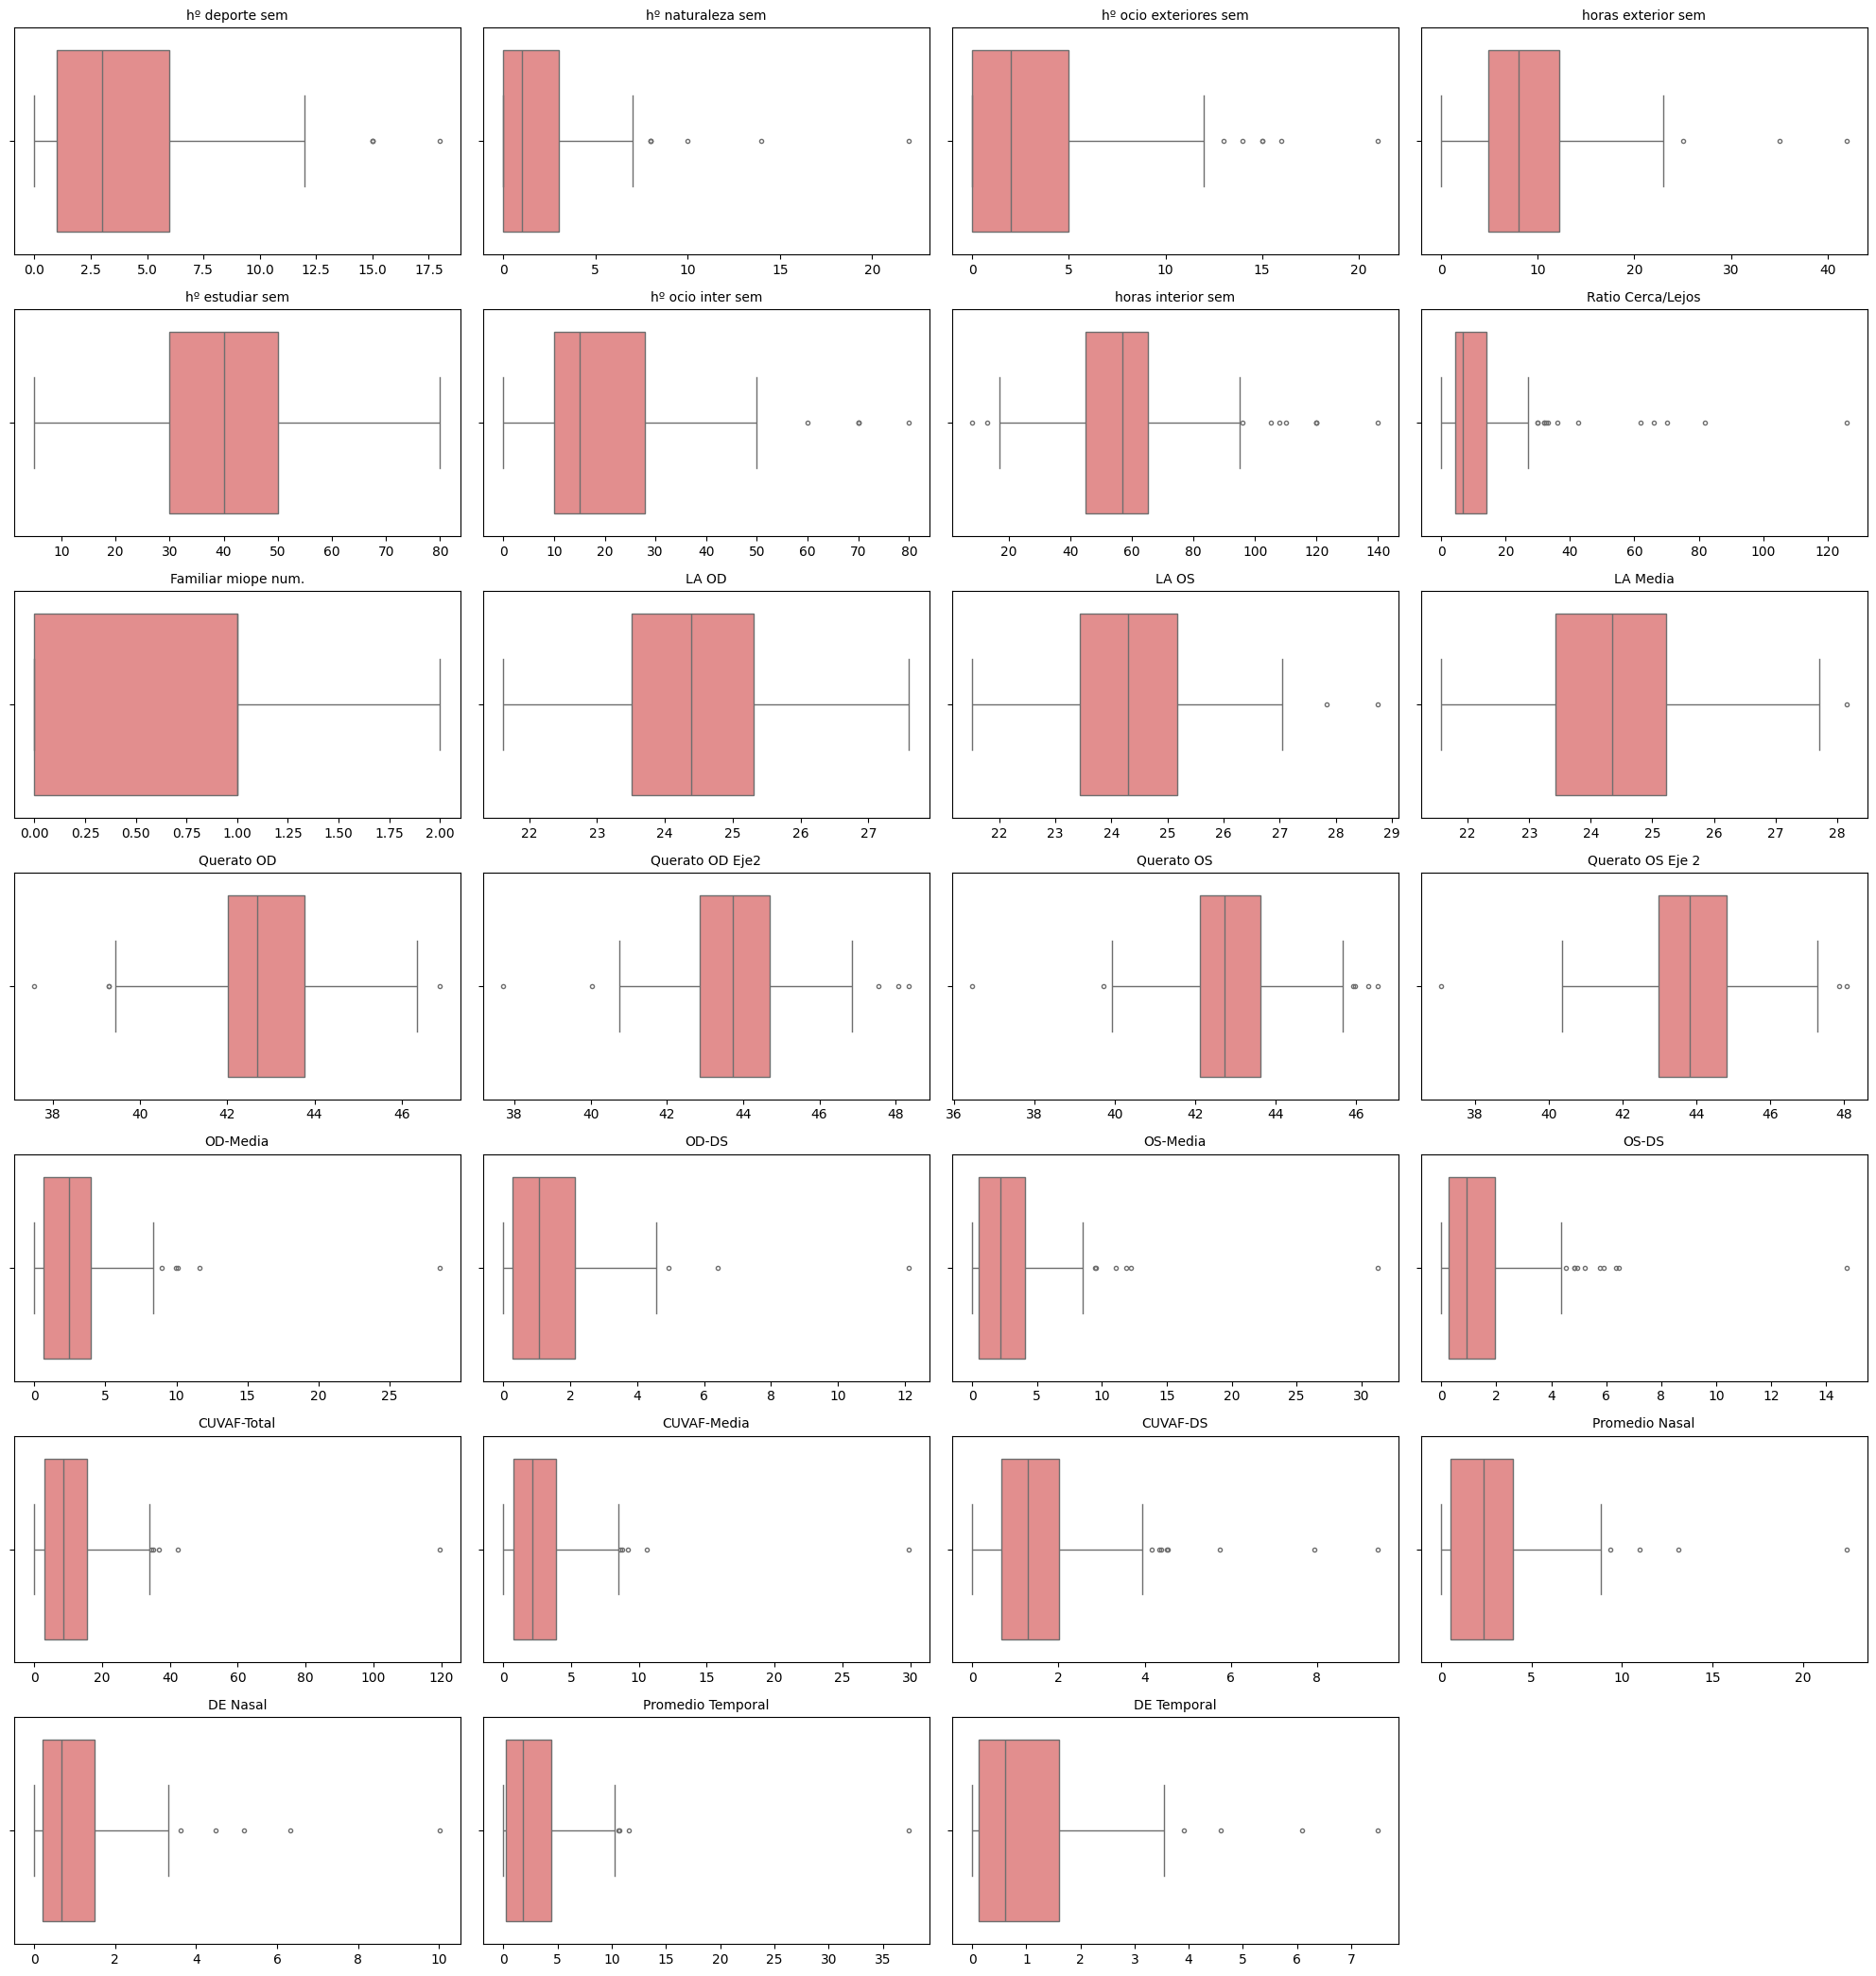

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar las columnas numéricas
num_cols = df_train.select_dtypes(include=[np.number]).columns

# Número total de columnas numéricas
n_cols = len(num_cols)
print(f"Número de variables numéricas: {n_cols}")

# Ajustar tamaño de la cuadrícula
ncols = 4  # número de gráficas por fila (puedes cambiarlo)
nrows = int(np.ceil(n_cols / ncols))

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 3))
axes = axes.flatten()

# Graficar un boxplot por variable
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_train[col], ax=axes[i], color='lightcoral', fliersize=3)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')

# Eliminar ejes vacíos (si sobran)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño general
plt.tight_layout()
plt.show()

Despues de representar las distribuciones de cada una de las variables numericas. Se puede observar cuales de ellas tienen outliers.

,Variable,Nº outliers,Límite inferior,Límite superior
6,Ratio Cerca/Lejos,13,-10.387868,28.679779
5,horas interior sem,10,14.625000,95.625000
16,OS-DS,10,-2.262300,4.472892
19,CUVAF-DS,8,-1.340232,4.042838
15,OS-Media,6,-4.766563,9.327604
11,Querato OS,6,39.871250,45.861250
1,hº naturaleza sem,6,-4.500000,7.500000
2,hº ocio exteriores sem,6,-7.500000,12.500000
21,DE Nasal,5,-1.735505,3.415768
17,CUVAF-Total,5,-15.384792,33.916875


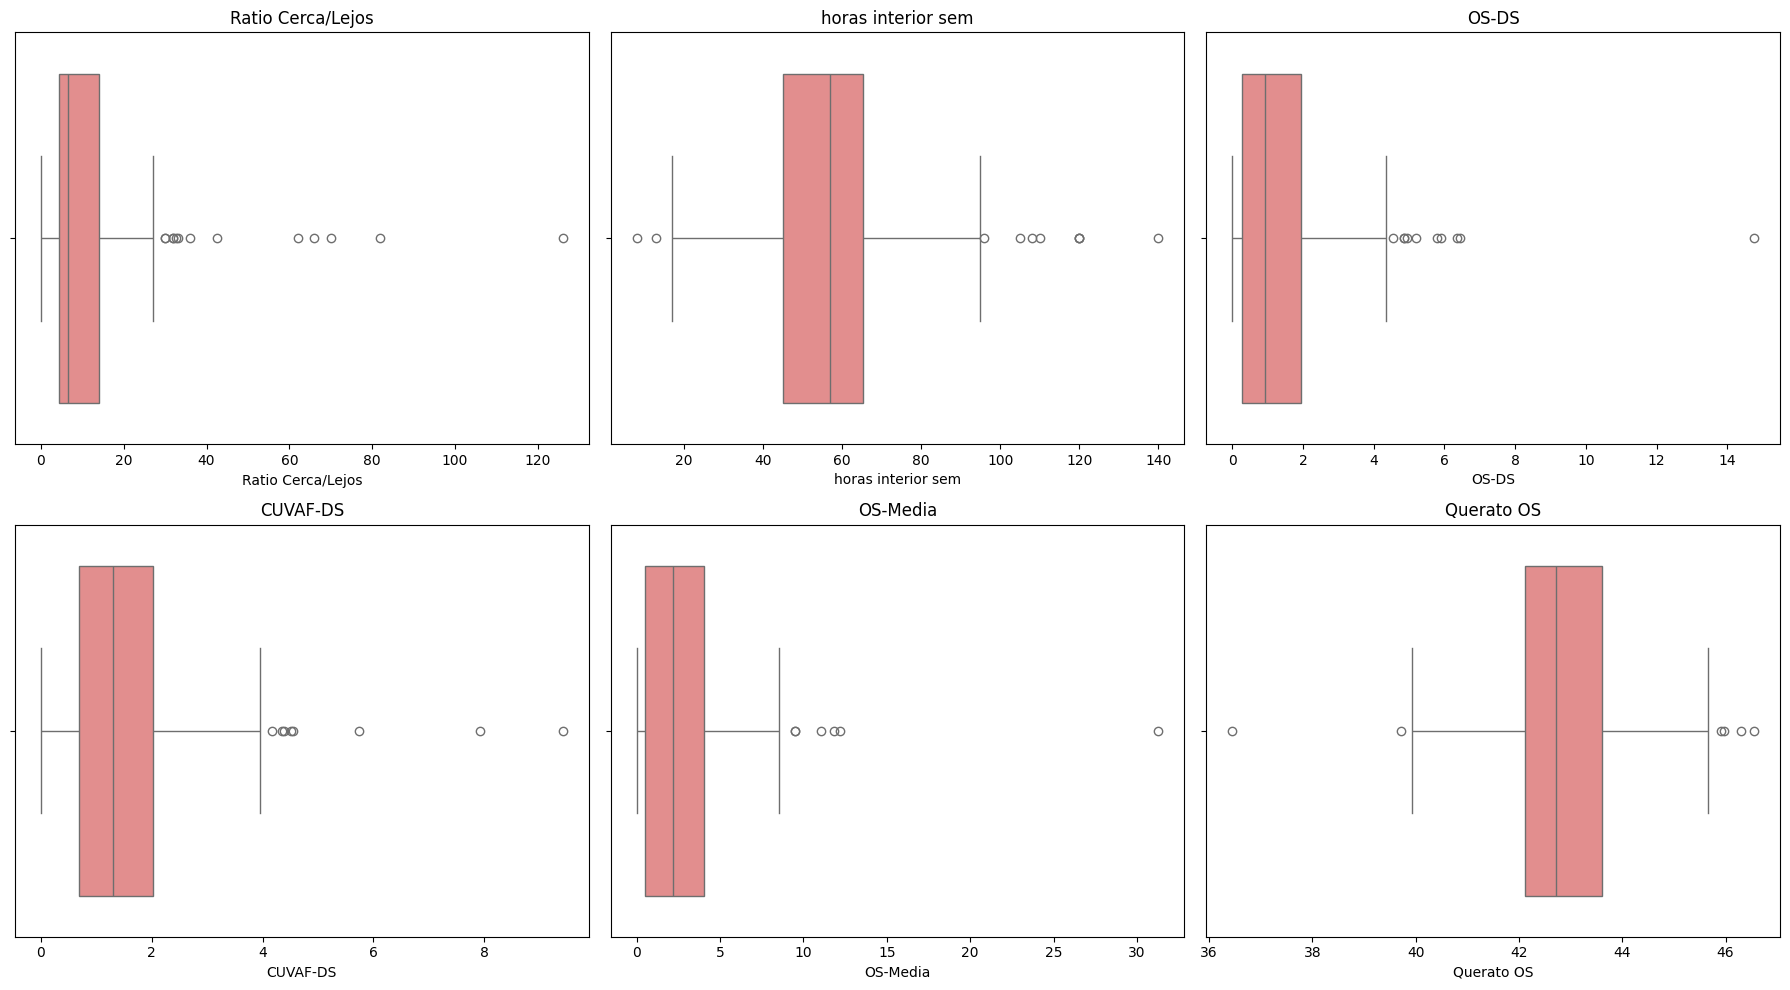

In [43]:
outliers_info = []

for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    n_outliers = df_train[(df_train[col] < lower) | (df_train[col] > upper)].shape[0]
    if n_outliers > 0:
        outliers_info.append([col, n_outliers, lower, upper])

outliers_df = pd.DataFrame(outliers_info, columns=["Variable", "Nº outliers", "Límite inferior", "Límite superior"])
display(outliers_df.sort_values(by="Nº outliers", ascending=False))

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las 6 variables con más outliers
top_outliers = outliers_df.sort_values(by="Nº outliers", ascending=False).head(6)["Variable"]

# Crear boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(top_outliers):
    sns.boxplot(x=df_train[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Se ven tres outliers principales muy diferenciados: OS-DS, CUVAF-DS y OS-Media. Se necesita comprobar al registro al que pertenece

In [44]:
#mostrar fila con el OS-DS maximo
df_train[df_train["OS-DS"] == df_train["OS-DS"].max()]

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal,M,MM,Combo,DCombo
25,Mujer,6.0,2.0,1.0,9.0,45,4,49.0,5.444444,NO,...,29.917917,9.412946,22.441667,2.250957,37.394167,6.096439,NO,NO,C,C


In [45]:
#mostrar fila con el OS-DS maximo
df_train[df_train["OS-DS"] == df_train["OS-DS"].max()]

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal,M,MM,Combo,DCombo
25,Mujer,6.0,2.0,1.0,9.0,45,4,49.0,5.444444,NO,...,29.917917,9.412946,22.441667,2.250957,37.394167,6.096439,NO,NO,C,C


In [46]:
#mostrar fila con el OS-DS maximo
df_train[df_train["OS-Media"] == df_train["OS-Media"].max()]

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal,M,MM,Combo,DCombo
25,Mujer,6.0,2.0,1.0,9.0,45,4,49.0,5.444444,NO,...,29.917917,9.412946,22.441667,2.250957,37.394167,6.096439,NO,NO,C,C


In [47]:
#mostrar fila con el OS-DS maximo
df_train[df_train["CUVAF-DS"] == df_train["CUVAF-DS"].max()]

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal,M,MM,Combo,DCombo
25,Mujer,6.0,2.0,1.0,9.0,45,4,49.0,5.444444,NO,...,29.917917,9.412946,22.441667,2.250957,37.394167,6.096439,NO,NO,C,C


Da la "casualidad" de que pertenece a la misma persona. Por lo tanto, las probabilidades de que los valores no sean reales bajan bastante porque son los tres valores en el mismo registro y podría darse el caso de que este sujeto tenga unos valores extremos

Outliers categóricos

In [48]:
#Seleccionar columnas no numéricas
cat_cols = df_train.select_dtypes(exclude=[np.number]).columns
print(f"Número de variables categóricas: {len(cat_cols)}")
display(cat_cols)

Número de variables categóricas: 13


Index(['sexo', 'Exterior Mucho', 'Interior Mcho', 'Familiar MM SI/NO',
       'pat. Ret. Miop magna', 'fumador', 'toma sol', 'protege sol',
       'disp.elec.antes dormir', 'M', 'MM', 'Combo', 'DCombo'],
      dtype='object')

In [49]:
# Mostrar los valores únicos por cada columna categórica
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_train[col].unique())


--- sexo ---
['Mujer' 'Hombre']

--- Exterior Mucho ---
['NO' 'SI']

--- Interior Mcho ---
['NO' 'SI']

--- Familiar MM SI/NO ---
['Si' 'No' 'No lo se']

--- pat. Ret. Miop magna ---
['No' 'No lo se' 'Sí, en ambos ojos']

--- fumador ---
['NO' 'SI']

--- toma sol ---
['SI' 'NO']

--- protege sol ---
['SI' 'NO']

--- disp.elec.antes dormir ---
['A veces' 'Siempre' 'Nunca']

--- M ---
['SI' 'NO']

--- MM ---
['SI' 'NO']

--- Combo ---
['MM' 'M' 'C']

--- DCombo ---
['MM' 'M1' 'C' 'M2']


In [50]:
#Respecto al familiar MM, se sustituye los valores de "No lo se" por un "No" ya que es más probable que ante un "No lo se" sea un "No" a que sea un "Si" ya que con un si algun familiar lo tuviera sería bastante probable que lo supieras
mode_familiar_MM = df_train["Familiar MM SI/NO"].mode()[0] #ademas el "No" como respuesta es la tónica general
mode_familiar_MM

'No'

In [51]:
df_train.loc[df_train["Familiar MM SI/NO"] == "No lo se", "Familiar MM SI/NO"] = mode_familiar_MM

In [52]:
#Se aplica la misma regla con "pat. Ret. Miop magna" que en el caso anterior
df_train.loc[df_train["pat. Ret. Miop magna"] == "No lo se", "pat. Ret. Miop magna"] = "No"

#Se corrige ademas las opciones de "Sí, en ambos ojos" por un "Sí"
df_train.loc[df_train["pat. Ret. Miop magna"] == "Sí, en ambos ojos", "pat. Ret. Miop magna"] = "Sí"


In [53]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_train[col].unique())


--- sexo ---
['Mujer' 'Hombre']

--- Exterior Mucho ---
['NO' 'SI']

--- Interior Mcho ---
['NO' 'SI']

--- Familiar MM SI/NO ---
['Si' 'No']

--- pat. Ret. Miop magna ---
['No' 'Sí']

--- fumador ---
['NO' 'SI']

--- toma sol ---
['SI' 'NO']

--- protege sol ---
['SI' 'NO']

--- disp.elec.antes dormir ---
['A veces' 'Siempre' 'Nunca']

--- M ---
['SI' 'NO']

--- MM ---
['SI' 'NO']

--- Combo ---
['MM' 'M' 'C']

--- DCombo ---
['MM' 'M1' 'C' 'M2']


##Preparacion X_test

In [54]:
import numpy as np
import pandas as pd

#Hacer una copia
X_test_preprocessed = X_test.copy()

In [55]:
#Vuelta a comprobar cantidad de valores nulos por columna
missing = X_test_preprocessed.isna().sum().sort_values(ascending=False)
print("\nCantidad valores nulos (Top 15):")
display(missing.head(15))


Cantidad valores nulos (Top 15):


,0
hº act.cerca sem,24
origen antepasados (extranjeros),18
fototipo,4
Grupo fot,4
hº naturaleza sem,2
pat. Ret. Miop magna,1
origen antepasados (españa),1
fecha,0
hº deporte sem,0
horas exterior sem,0


In [56]:
dropped_cols_from_X_train = [
    "hº act.cerca sem",
    "origen antepasados (extranjeros)",
    "Grupo fot",
    "fototipo",
    "origen antepasados (españa)",
    "familiar miope magno",
    "fecha",
    "edad",
    "OD-Total",
    "OS-Total",
    "Suma Nasal",
    "Suma Temporal",
    "familiar miope"
]

X_test_preprocessed = X_test_preprocessed.drop(columns=[col for col in dropped_cols_from_X_train if col in X_test_preprocessed.columns])

median_h_ocio_exteriores_sem = df_train["hº ocio exteriores sem"].median()
median_horas_interior_sem = df_train["horas interior sem"].median()
median_horas_nat = df_train["hº naturaleza sem"].median()

# Fill NaNs in 'Familiar miope num.' with 0, as done in training
X_test_preprocessed["Familiar miope num."] = X_test_preprocessed["Familiar miope num."].fillna(0)

# Impute 'hº ocio exteriores sem' with the median from training data
X_test_preprocessed["hº ocio exteriores sem"] = X_test_preprocessed["hº ocio exteriores sem"].fillna(median_h_ocio_exteriores_sem)

# Impute 'horas interior sem' with the median from training data
X_test_preprocessed["horas interior sem"] = X_test_preprocessed["horas interior sem"].fillna(median_horas_interior_sem)

#mediana horas naturaleza
X_test_preprocessed["hº naturaleza sem"] = X_test_preprocessed["hº naturaleza sem"].fillna(median_horas_nat)

# Correct 'pat. Ret. Miop magna' values
X_test_preprocessed.loc[X_test_preprocessed["pat. Ret. Miop magna"] == "No lo se", "pat. Ret. Miop magna"] = "No"
X_test_preprocessed.loc[X_test_preprocessed["pat. Ret. Miop magna"] == "Sí, en ambos ojos", "pat. Ret. Miop magna"] = "Sí"

#poner "No" en los nulos de la columna pat. Ret. Miop magna
X_test_preprocessed["pat. Ret. Miop magna"].fillna("No", inplace=True)

# Correct 'Familiar MM SI/NO' values
X_test_preprocessed.loc[X_test_preprocessed["Familiar MM SI/NO"] == "No lo se", "Familiar MM SI/NO"] = "No"

#Vuelta a comprobar cantidad de valores nulos por columna
missing = X_test_preprocessed.isna().sum().sort_values(ascending=False)
print("\nCantidad valores nulos (Top 15):")
display(missing.head(15))


Cantidad valores nulos (Top 15):


/tmp/ipython-input-2484470095.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_preprocessed["pat. Ret. Miop magna"].fillna("No", inplace=True)


,0
sexo,0
hº deporte sem,0
hº naturaleza sem,0
hº ocio exteriores sem,0
horas exterior sem,0
hº estudiar sem,0
hº ocio inter sem,0
horas interior sem,0
Ratio Cerca/Lejos,0
Exterior Mucho,0


In [57]:
# --- 4. Identify numerical and categorical columns for one-hot encoding ---
# Ensure these columns match those identified from the preprocessed X_train before one-hot encoding
# (i.e., 'num_cols' and 'cat_cols' that were used to create X_pre)
X = df_train.drop(columns=["M", "MM", "Combo", "DCombo"])  # quitamos labels del dataset
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
X_cat_encoded = pd.get_dummies(X[cat_cols], drop_first=False)

# Combinar numéricas + categóricas codificadas
X_pre = pd.concat([X[num_cols], X_cat_encoded], axis=1)

num_cols_X_pre = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_X_pre = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Re-align X_test_preprocessed columns to match the num_cols_X_pre and cat_cols_X_pre
# This is important in case some columns were not dropped but are also not numeric/categorical correctly

X_test_preprocessed_num = X_test_preprocessed[num_cols_X_pre]
X_test_preprocessed_cat = X_test_preprocessed[cat_cols_X_pre]

# --- 5. One-Hot Encoding ---
X_test_cat_encoded = pd.get_dummies(X_test_preprocessed_cat, drop_first=False)

# Ensure that the one-hot encoded columns in X_test match X_pre
# Get all columns from the training X_pre to ensure consistency
all_X_pre_cols = X.columns

# Concatenate numerical and one-hot encoded categorical columns
X_test_final = pd.concat([X_test_preprocessed_num, X_test_cat_encoded], axis=1)

# Reindex X_test_final to match all_X_pre_cols, filling missing with 0
X_test_final = X_test_final.reindex(columns=all_X_pre_cols, fill_value=0)

print("Shape of X_test after full preprocessing (matching X_pre):", X_test_final.shape)
display(X_test_final.head())

Shape of X_test after full preprocessing (matching X_pre): (24, 36)


,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,OD-DS,OS-Media,OS-DS,CUVAF-Total,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal
0,0,4.0,0.0,0,4.0,25,30.0,55.0,13.750000,0,...,0.945166,9.772500,3.949191,28.075000,0.018750,3.950612,8.080833,6.341569,5.956667,1.447212
1,0,6.0,2.0,1,9.0,45,12.0,57.0,6.333333,0,...,2.457196,0.925000,0.473762,5.325000,1.331250,1.519037,0.295000,0.417193,2.367500,1.566242
2,0,5.0,1.0,0,6.0,55,21.0,76.0,12.666667,0,...,1.310505,0.676667,0.956951,3.206667,0.801667,0.947924,1.603333,0.353553,0.000000,0.000000
3,0,3.0,3.0,5,11.0,40,15.0,55.0,5.000000,0,...,1.129014,6.040000,4.247355,21.396667,5.349167,2.659806,3.448333,0.582185,7.250000,2.536156
4,0,3.0,3.0,4,10.0,0,22.0,22.0,2.200000,0,...,0.535044,0.215000,0.304056,1.186667,0.296667,0.367605,0.593333,0.230988,0.000000,0.000000


##Modelizacion Miopia

###Preparacion de los datos

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Target y features
y = df_train["M"].map({"NO": 0, "SI": 1})   # binarizamos la etiqueta
X = df_train.drop(columns=["M", "MM", "Combo", "DCombo"])  # quitamos labels del dataset

X.head()

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,OD-DS,OS-Media,OS-DS,CUVAF-Total,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal
0,Mujer,0.0,0.0,4.0,4.0,40,6,46.0,11.500000,NO,...,1.202082,0.168333,0.238059,2.256667,0.564167,0.842300,0.905000,1.279863,0.223333,0.160278
1,Mujer,5.0,2.0,2.0,9.0,20,30,50.0,5.555556,NO,...,1.979899,2.148333,2.585654,8.026667,2.006667,1.887316,3.620833,0.503224,0.392500,0.102530
2,Mujer,2.0,3.0,8.0,13.0,30,15,45.0,3.461538,NO,...,0.502046,3.730000,0.431335,12.710000,3.177500,0.743668,3.152500,1.248043,3.202500,0.314663
3,Mujer,0.0,2.0,13.0,15.0,54,12,66.0,4.400000,NO,...,0.300520,1.563333,0.626968,3.551667,0.887917,0.877145,1.003333,1.418928,0.772500,0.491439
4,Mujer,3.0,0.0,0.0,3.0,56,15,71.0,23.666667,SI,...,0.000000,0.897500,1.269257,1.795000,0.448750,0.897500,0.897500,1.269257,0.000000,0.000000


In [59]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))

Numéricas: 27
Categóricas: 9


In [60]:
# One-hot encoding manual de las categóricas
X_cat_encoded = pd.get_dummies(X[cat_cols], drop_first=False)

# Combinar numéricas + categóricas codificadas
X_pre = pd.concat([X[num_cols], X_cat_encoded], axis=1)
print("Shape final del dataset:", X_pre.shape)
X_pre.head()

Shape final del dataset: (132, 46)


,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Familiar miope num.,LA OD,...,pat. Ret. Miop magna_Sí,fumador_NO,fumador_SI,toma sol_NO,toma sol_SI,protege sol_NO,protege sol_SI,disp.elec.antes dormir_A veces,disp.elec.antes dormir_Nunca,disp.elec.antes dormir_Siempre
0,0.0,0.0,4.0,4.0,40,6,46.0,11.500000,1.0,24.92,...,False,True,False,False,True,False,True,True,False,False
1,5.0,2.0,2.0,9.0,20,30,50.0,5.555556,0.0,23.36,...,False,True,False,False,True,False,True,True,False,False
2,2.0,3.0,8.0,13.0,30,15,45.0,3.461538,2.0,22.40,...,False,True,False,False,True,False,True,False,False,True
3,0.0,2.0,13.0,15.0,54,12,66.0,4.400000,0.0,24.34,...,False,True,False,False,True,False,True,False,False,True
4,3.0,0.0,0.0,3.0,56,15,71.0,23.666667,0.0,22.47,...,False,False,True,True,False,True,False,False,False,True


###Random Forest

Se busca primero los mejores parametros para el arbol mediante CV

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np

# Definición de la rejilla de búsqueda
param_dist = {
    'n_estimators': randint(100, 600),       # número de árboles
    'max_depth': [None, 12, 10, 8, 6],       # profundidad máxima del árbol
    'min_samples_split': randint(2, 10),     # mínimo de muestras por split
    'min_samples_leaf': randint(1, 5),       # mínimo de muestras en hoja
    'max_features': ['sqrt', 'log2']         # nº de variables consideradas por split
}

# Modelo base
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Búsqueda aleatoria con validación cruzada interna
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # número de combinaciones a probar
    scoring='f1_macro',
    cv=5,                    # CV interna de 5 folds
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento de la búsqueda
random_search.fit(X_pre, y)

# Resultados
print("🔍 Mejores parámetros encontrados:")
print(random_search.best_params_)
print(f"Mejor F1 macro (CV interna): {random_search.best_score_:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados:
{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 379}
Mejor F1 macro (CV interna): 0.778


Entrenamiento del modelo con los mejores parametros que hemos encontrado

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=6,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=379,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_pre, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_pre, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa:
F1-macro medio: 0.760 ± 0.111
Accuracy medio: 0.787 ± 0.091


Con este mismo arbol optimizado se ve que variables tienen mayor importancia

In [63]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Entrenamos un modelo completo sobre todo el train (con los mejores hiperparámetros anteriores)
rf_import = RandomForestClassifier(
    max_depth=6,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=379,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_import.fit(X_pre, y)

# Extraer importancias
importances = pd.Series(rf_import.feature_importances_, index=X_pre.columns).sort_values(ascending=False)

# Mostrar las 20 variables más importantes
print("🔝 Top 20 variables más importantes:")
display(importances.head(20))

🔝 Top 20 variables más importantes:


,0
LA OS,0.145863
LA Media,0.133785
LA OD,0.118522
DE Nasal,0.033222
Querato OS,0.031842
OS-DS,0.031293
CUVAF-DS,0.029641
hº estudiar sem,0.029373
Querato OD Eje2,0.028925
Ratio Cerca/Lejos,0.028364


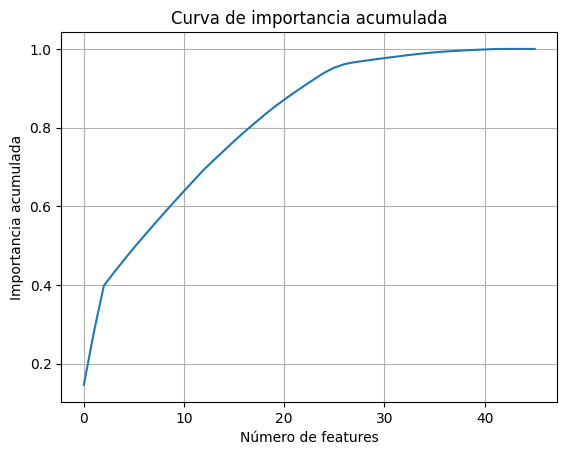

In [64]:
importances_sorted = importances.sort_values(ascending=False)
cumulative_importance = importances_sorted.cumsum()

import matplotlib.pyplot as plt
plt.plot(range(len(cumulative_importance)), cumulative_importance)
plt.xlabel("Número de features")
plt.ylabel("Importancia acumulada")
plt.title("Curva de importancia acumulada")
plt.grid()
plt.show()

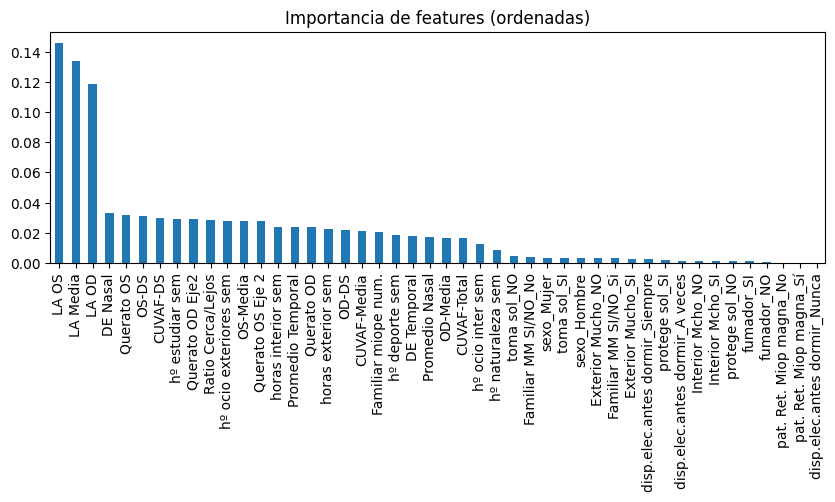

In [65]:
importances_sorted.plot(kind="bar", figsize=(10,3))
plt.title("Importancia de features (ordenadas)")
plt.show()

Se ve como a partir de las 25 features, la curva se aplana mucho y por tanto las features que se añaden simplemente aportan ruido

In [66]:
# Seleccionar las k variables más relevantes (puedes ajustar k)
k = 25
top_features = importances.head(k).index.tolist()

# Crear dataset reducido con esas variables
X_fs = X_pre[top_features].copy()
print(f"\n✅ Usando las {k} features más importantes de un total de {X_pre.shape[1]} columnas.")


✅ Usando las 25 features más importantes de un total de 46 columnas.


Volvemos a entrenar el mismo arbol pero con esta misma FS

In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=6,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=6,
    n_estimators=379,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa y FS:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa y FS:
F1-macro medio: 0.744 ± 0.107
Accuracy medio: 0.779 ± 0.081


Se hace ahora un CV para encontrar los mejores parametros del arbol pero con la FS realizada

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir la misma rejilla de hiperparámetros que antes
param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [None, 12, 10, 8, 6],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

random_search_fs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenar la búsqueda con las features seleccionadas
random_search_fs.fit(X_fs, y)

print("🔍 Mejores parámetros encontrados (con FS):")
print(random_search_fs.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_fs.best_score_:.3f}")

# Calcular accuracy medio con esos parámetros
from sklearn.model_selection import cross_val_score
best_params_fs = random_search_fs.best_params_
rf_tmp_fs = RandomForestClassifier(**best_params_fs, class_weight="balanced", random_state=42, n_jobs=-1)
acc_internal_fs = cross_val_score(rf_tmp_fs, X_fs, y, cv=5, scoring='accuracy')
print(f"Accuracy medio (CV interna): {acc_internal_fs.mean():.3f} ± {acc_internal_fs.std():.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados (con FS):
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 575}
Mejor F1-macro (CV interna): 0.758
Accuracy medio (CV interna): 0.787 ± 0.085


Se entrena el arbol ahora con la FS incorporada y los mejores parametros calculados

In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

rf_best_fs = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=9,
    n_estimators=575,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1_fs = cross_val_score(rf_best_fs, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc_fs = cross_val_score(rf_best_fs, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con RE-CV externa (Feature Selection):")
print(f"F1-macro medio: {scores_f1_fs.mean():.3f} ± {scores_f1_fs.std():.3f}")
print(f"Accuracy medio: {scores_acc_fs.mean():.3f} ± {scores_acc_fs.std():.3f}")


📊 Evaluación final con RE-CV externa (Feature Selection):
F1-macro medio: 0.726 ± 0.100
Accuracy medio: 0.757 ± 0.081


###XG Boost

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_pre, y)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.7061753482887407), 'gamma': np.float64(0.9699098521619943), 'learning_rate': np.float64(0.17648852816008437), 'max_depth': 8, 'n_estimators': 485, 'subsample': np.float64(0.7545474901621302)}
Mejor F1-macro (CV interna): 0.751


In [71]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.706,
    gamma=0.97,
    learning_rate=0.1765,
    max_depth=8,
    n_estimators=485,
    subsample=0.75455,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_pre, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_pre, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.783 ± 0.113
Accuracy medio: 0.809 ± 0.089


In [72]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.706,
    gamma=0.97,
    learning_rate=0.1765,
    max_depth=8,
    n_estimators=485,
    subsample=0.75455,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.802 ± 0.076
Accuracy medio: 0.825 ± 0.059


In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Dataset con las top features seleccionadas por RF
X_fs_xgb = X_pre[top_features].copy()

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_fs_xgb, y)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.7550213529560301), 'gamma': np.float64(0.3042422429595377), 'learning_rate': np.float64(0.11495128632644756), 'max_depth': 6, 'n_estimators': 444, 'subsample': np.float64(0.7873687420594125)}
Mejor F1-macro (CV interna): 0.748


In [74]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.755,
    gamma=0.304,
    learning_rate=0.115,
    max_depth=6,
    n_estimators=444,
    subsample=0.787,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs_xgb, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs_xgb, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.708 ± 0.046
Accuracy medio: 0.750 ± 0.033


El modelo final empleado sera el XGBoost que tiene el FS procedente del RF y cuya optimizacion ha sido la primera. Es decir, a partir de todas las features

In [75]:
xgb_best = XGBClassifier(
    colsample_bytree=0.706,
    gamma=0.97,
    learning_rate=0.1765,
    max_depth=8,
    n_estimators=485,
    subsample=0.75455,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")



📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.802 ± 0.076
Accuracy medio: 0.825 ± 0.059


In [76]:
#Entrenamos ahora el modelo
xgb_best.fit(X_fs, y)

#Predicciones
X_test_final_fs=X_test_final[top_features].copy()
M_pred = xgb_best.predict(X_test_final_fs)
M_pred= np.where(M_pred == 1, "SI", "NO")
print(M_pred)

['SI' 'NO' 'SI' 'SI' 'NO' 'SI' 'SI' 'SI' 'NO' 'SI' 'NO' 'NO' 'SI' 'SI'
 'SI' 'SI' 'SI' 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO']


##Modelizacion Miopia Magna

###Preparacion de los datos

In [77]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Target y features
y = df_train["MM"].map({"NO": 0, "SI": 1})   # binarizamos la etiqueta
X = df_train.drop(columns=["M", "MM", "Combo", "DCombo"])  # quitamos labels del dataset

X.head()

,sexo,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Exterior Mucho,...,OD-DS,OS-Media,OS-DS,CUVAF-Total,CUVAF-Media,CUVAF-DS,Promedio Nasal,DE Nasal,Promedio Temporal,DE Temporal
0,Mujer,0.0,0.0,4.0,4.0,40,6,46.0,11.500000,NO,...,1.202082,0.168333,0.238059,2.256667,0.564167,0.842300,0.905000,1.279863,0.223333,0.160278
1,Mujer,5.0,2.0,2.0,9.0,20,30,50.0,5.555556,NO,...,1.979899,2.148333,2.585654,8.026667,2.006667,1.887316,3.620833,0.503224,0.392500,0.102530
2,Mujer,2.0,3.0,8.0,13.0,30,15,45.0,3.461538,NO,...,0.502046,3.730000,0.431335,12.710000,3.177500,0.743668,3.152500,1.248043,3.202500,0.314663
3,Mujer,0.0,2.0,13.0,15.0,54,12,66.0,4.400000,NO,...,0.300520,1.563333,0.626968,3.551667,0.887917,0.877145,1.003333,1.418928,0.772500,0.491439
4,Mujer,3.0,0.0,0.0,3.0,56,15,71.0,23.666667,SI,...,0.000000,0.897500,1.269257,1.795000,0.448750,0.897500,0.897500,1.269257,0.000000,0.000000


In [78]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))

Numéricas: 27
Categóricas: 9


In [79]:
# One-hot encoding manual de las categóricas
X_cat_encoded = pd.get_dummies(X[cat_cols], drop_first=False)

# Combinar numéricas + categóricas codificadas
X_pre = pd.concat([X[num_cols], X_cat_encoded], axis=1)
print("Shape final del dataset:", X_pre.shape)
X_pre.head()

Shape final del dataset: (132, 46)


,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Familiar miope num.,LA OD,...,pat. Ret. Miop magna_Sí,fumador_NO,fumador_SI,toma sol_NO,toma sol_SI,protege sol_NO,protege sol_SI,disp.elec.antes dormir_A veces,disp.elec.antes dormir_Nunca,disp.elec.antes dormir_Siempre
0,0.0,0.0,4.0,4.0,40,6,46.0,11.500000,1.0,24.92,...,False,True,False,False,True,False,True,True,False,False
1,5.0,2.0,2.0,9.0,20,30,50.0,5.555556,0.0,23.36,...,False,True,False,False,True,False,True,True,False,False
2,2.0,3.0,8.0,13.0,30,15,45.0,3.461538,2.0,22.40,...,False,True,False,False,True,False,True,False,False,True
3,0.0,2.0,13.0,15.0,54,12,66.0,4.400000,0.0,24.34,...,False,True,False,False,True,False,True,False,False,True
4,3.0,0.0,0.0,3.0,56,15,71.0,23.666667,0.0,22.47,...,False,False,True,True,False,True,False,False,False,True


###Random Forest

Se busca primero los mejores parametros para el arbol mediante CV

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np

# Definición de la rejilla de búsqueda
param_dist = {
    'n_estimators': randint(100, 600),       # número de árboles
    'max_depth': [None, 12, 10, 8, 6],       # profundidad máxima del árbol
    'min_samples_split': randint(2, 10),     # mínimo de muestras por split
    'min_samples_leaf': randint(1, 5),       # mínimo de muestras en hoja
    'max_features': ['sqrt', 'log2']         # nº de variables consideradas por split
}

# Modelo base
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Búsqueda aleatoria con validación cruzada interna
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # número de combinaciones a probar
    scoring='f1_macro',
    cv=5,                    # CV interna de 5 folds
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento de la búsqueda
random_search.fit(X_pre, y)

# Resultados
print("🔍 Mejores parámetros encontrados:")
print(random_search.best_params_)
print(f"Mejor F1 macro (CV interna): {random_search.best_score_:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados:
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171}
Mejor F1 macro (CV interna): 0.903


Entrenamiento del modelo con los mejores parametros que hemos encontrado

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_pre, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_pre, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa:
F1-macro medio: 0.916 ± 0.048
Accuracy medio: 0.962 ± 0.023


Con este mismo arbol optimizado se ve que variables tienen mayor importancia

In [82]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Entrenamos un modelo completo sobre todo el train (con los mejores hiperparámetros anteriores)
rf_import = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_import.fit(X_pre, y)

# Extraer importancias
importances = pd.Series(rf_import.feature_importances_, index=X_pre.columns).sort_values(ascending=False)

# Mostrar las 20 variables más importantes
print("🔝 Top 20 variables más importantes:")
display(importances.head(20))

🔝 Top 20 variables más importantes:


,0
LA Media,0.255447
LA OS,0.194829
LA OD,0.140783
Querato OD,0.040238
horas exterior sem,0.037295
hº deporte sem,0.030194
Querato OS Eje 2,0.026392
OS-Media,0.024194
Querato OS,0.022591
Promedio Nasal,0.020564


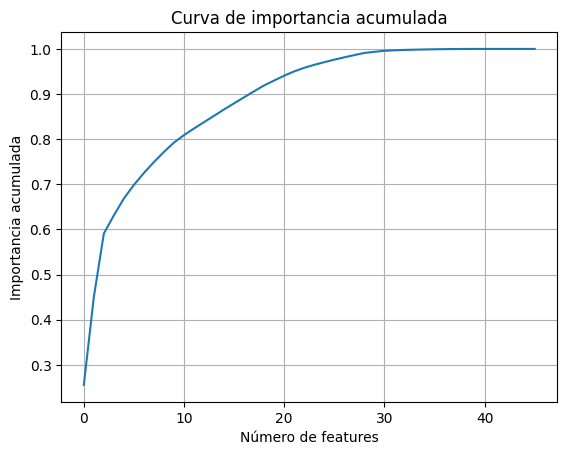

In [83]:
importances_sorted = importances.sort_values(ascending=False)
cumulative_importance = importances_sorted.cumsum()

import matplotlib.pyplot as plt
plt.plot(range(len(cumulative_importance)), cumulative_importance)
plt.xlabel("Número de features")
plt.ylabel("Importancia acumulada")
plt.title("Curva de importancia acumulada")
plt.grid()
plt.show()

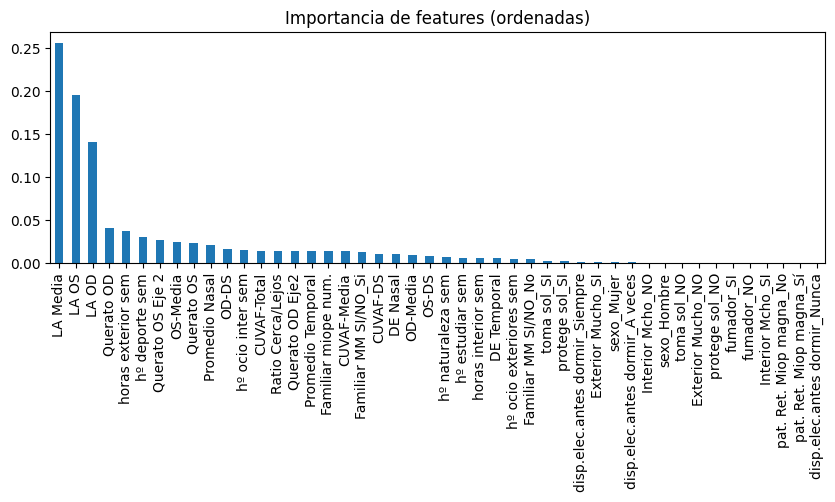

In [84]:
importances_sorted.plot(kind="bar", figsize=(10,3))
plt.title("Importancia de features (ordenadas)")
plt.show()

In [85]:
# Seleccionar las k variables más relevantes (puedes ajustar k)
k = 15
top_features = importances.head(k).index.tolist()

# Crear dataset reducido con esas variables
X_fs = X_pre[top_features].copy()
print(f"\n✅ Usando las {k} features más importantes de un total de {X_pre.shape[1]} columnas.")


✅ Usando las 15 features más importantes de un total de 46 columnas.


Volvemos a entrenar el mismo arbol con esta misma FS

In [86]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa y FS:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa y FS:
F1-macro medio: 0.916 ± 0.048
Accuracy medio: 0.962 ± 0.023


Se hace ahora un CV para encontrar los mejores parametros del arbol pero con la FS realizada

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir la misma rejilla de hiperparámetros que antes
param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [None, 12, 10, 8, 6],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

random_search_fs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenar la búsqueda con las features seleccionadas
random_search_fs.fit(X_fs, y)

print("🔍 Mejores parámetros encontrados (con FS):")
print(random_search_fs.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_fs.best_score_:.3f}")

# Calcular accuracy medio con esos parámetros
from sklearn.model_selection import cross_val_score
best_params_fs = random_search_fs.best_params_
rf_tmp_fs = RandomForestClassifier(**best_params_fs, class_weight="balanced", random_state=42, n_jobs=-1)
acc_internal_fs = cross_val_score(rf_tmp_fs, X_fs, y, cv=5, scoring='accuracy')
print(f"Accuracy medio (CV interna): {acc_internal_fs.mean():.3f} ± {acc_internal_fs.std():.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados (con FS):
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171}
Mejor F1-macro (CV interna): 0.917
Accuracy medio (CV interna): 0.963 ± 0.033


Se entrena el arbol ahora con la FS incorporada y los mejores parametros calculados

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

rf_best_fs = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1_fs = cross_val_score(rf_best_fs, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc_fs = cross_val_score(rf_best_fs, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con RE-CV externa (Feature Selection):")
print(f"F1-macro medio: {scores_f1_fs.mean():.3f} ± {scores_f1_fs.std():.3f}")
print(f"Accuracy medio: {scores_acc_fs.mean():.3f} ± {scores_acc_fs.std():.3f}")


📊 Evaluación final con RE-CV externa (Feature Selection):
F1-macro medio: 0.916 ± 0.048
Accuracy medio: 0.962 ± 0.023


###XG Boost

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_pre, y)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.8123620356542087), 'gamma': np.float64(0.9507143064099162), 'learning_rate': np.float64(0.15639878836228102), 'max_depth': 7, 'n_estimators': 120, 'subsample': np.float64(0.7468055921327309)}
Mejor F1-macro (CV interna): 0.917


In [90]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.8124,
    gamma=0.951,
    learning_rate=0.1564,
    max_depth=7,
    n_estimators=120,
    subsample=0.75468,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_pre, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_pre, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.902 ± 0.028
Accuracy medio: 0.955 ± 0.014


In [91]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.8124,
    gamma=0.951,
    learning_rate=0.1564,
    max_depth=7,
    n_estimators=120,
    subsample=0.75468,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.895 ± 0.063
Accuracy medio: 0.955 ± 0.028


In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_fs, y)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.8123620356542087), 'gamma': np.float64(0.9507143064099162), 'learning_rate': np.float64(0.15639878836228102), 'max_depth': 7, 'n_estimators': 120, 'subsample': np.float64(0.7468055921327309)}
Mejor F1-macro (CV interna): 0.917


In [93]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.81,
    gamma=0.951,
    learning_rate=0.1564,
    max_depth=7,
    n_estimators=120,
    subsample=0.747,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.895 ± 0.063
Accuracy medio: 0.955 ± 0.028


In [94]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_fs, y, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa y FS:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa y FS:
F1-macro medio: 0.916 ± 0.048
Accuracy medio: 0.962 ± 0.023


In [95]:
rf_best.fit(X_fs,y)

#Predicciones
X_test_final_fs=X_test_final[top_features].copy()
MM_pred = rf_best.predict(X_test_final_fs)
MM_pred= np.where(MM_pred == 1, "SI", "NO")
print(MM_pred)

['SI' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'NO' 'NO'
 'NO' 'SI' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


##Correccion de M con MM

In [96]:
import numpy as np
import pandas as pd

# Crear DataFrame conjunto con ambas predicciones
resultados_finales = pd.DataFrame({
    "M_pred": M_pred,
    "MM_pred": MM_pred
})

print(resultados_finales)

   M_pred MM_pred
0      SI      SI
1      NO      NO
2      SI      SI
3      SI      NO
4      NO      NO
5      SI      NO
6      SI      NO
7      SI      SI
8      NO      NO
9      SI      SI
10     NO      NO
11     NO      NO
12     SI      NO
13     SI      NO
14     SI      NO
15     SI      SI
16     SI      NO
17     NO      NO
18     NO      NO
19     SI      NO
20     SI      NO
21     NO      NO
22     SI      NO
23     NO      NO


In [97]:
incoherentes = resultados_finales[
    (resultados_finales["MM_pred"] == "SI") &
    (resultados_finales["M_pred"] == "NO")
]

print(f"Casos incoherentes antes de la corrección: {len(incoherentes)}")

Casos incoherentes antes de la corrección: 0


In [98]:
# Aplicar la regla: si MM = "SI" → forzar M = "SI"
resultados_finales.loc[resultados_finales["MM_pred"] == "SI", "M_pred"] = "SI"

print("✅ Corrección aplicada: ningún caso con MM='SI' tiene ahora M='NO'")
display(resultados_finales.head(10))

✅ Corrección aplicada: ningún caso con MM='SI' tiene ahora M='NO'


,M_pred,MM_pred
0,SI,SI
1,NO,NO
2,SI,SI
3,SI,NO
4,NO,NO
5,SI,NO
6,SI,NO
7,SI,SI
8,NO,NO
9,SI,SI


In [99]:
incoherentes = resultados_finales[
    (resultados_finales["MM_pred"] == "SI") &
    (resultados_finales["M_pred"] == "NO")
]

print(f"Casos incoherentes después de la corrección: {len(incoherentes)}")

Casos incoherentes después de la corrección: 0


##Modelizacion Combo

Para modelizar el combo, lo que se ha hecho es imputar sus valores directamente en funcion de lo obtenido en

In [100]:
# Crear columna Combo coherente
def combinar_m_mm(row):
    if row["MM_pred"] == "SI":
        return "MM"
    elif row["M_pred"] == "SI":
        return "M"
    else:
        return "C"

resultados_finales["Combo_pred"] = resultados_finales.apply(combinar_m_mm, axis=1)

display(resultados_finales)

,M_pred,MM_pred,Combo_pred
0,SI,SI,MM
1,NO,NO,C
2,SI,SI,MM
3,SI,NO,M
4,NO,NO,C
5,SI,NO,M
6,SI,NO,M
7,SI,SI,MM
8,NO,NO,C
9,SI,SI,MM


##Modelizacion DCombo

###Preparacion de los datos

In [101]:
# Filtrar los casos de miopía no magna (DCombo = M1 o M2)
df_train_dcombo = df_train[df_train["DCombo"].isin(["M1", "M2"])].copy()

# Variables X e y
X_dcombo = df_train_dcombo.drop(columns=["M", "MM", "Combo", "DCombo"])
y_dcombo = df_train_dcombo["DCombo"].map({"M1": 0, "M2": 1})

In [102]:
# One-hot encoding manual de las categóricas
X_cat_encoded = pd.get_dummies(X_dcombo[cat_cols], drop_first=False)

# Combinar numéricas + categóricas codificadas
X_pre = pd.concat([X_dcombo[num_cols], X_cat_encoded], axis=1)
print("Shape final del dataset:", X_pre.shape)
X_pre.head()

Shape final del dataset: (70, 44)


,hº deporte sem,hº naturaleza sem,hº ocio exteriores sem,horas exterior sem,hº estudiar sem,hº ocio inter sem,horas interior sem,Ratio Cerca/Lejos,Familiar miope num.,LA OD,...,Familiar MM SI/NO_Si,pat. Ret. Miop magna_No,fumador_NO,fumador_SI,toma sol_NO,toma sol_SI,protege sol_NO,protege sol_SI,disp.elec.antes dormir_A veces,disp.elec.antes dormir_Siempre
1,5.0,2.0,2.0,9.0,20,30,50.0,5.555556,0.0,23.36,...,False,True,True,False,False,True,False,True,True,False
6,9.0,0.0,0.0,9.0,40,20,60.0,6.666667,0.0,24.54,...,False,True,True,False,False,True,False,True,False,True
8,0.0,0.0,0.0,0.0,45,14,59.0,66.000000,1.0,24.19,...,True,True,False,True,False,True,False,True,False,True
10,2.0,0.0,6.0,8.0,10,30,40.0,5.000000,1.0,24.41,...,False,True,True,False,False,True,True,False,True,False
14,2.0,3.0,2.0,7.0,32,14,46.0,6.571429,2.0,25.30,...,False,True,True,False,False,True,False,True,False,True


###Random Forest

Se busca primero los mejores parametros para el arbol mediante CV

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import numpy as np

# Definición de la rejilla de búsqueda
param_dist = {
    'n_estimators': randint(100, 600),       # número de árboles
    'max_depth': [None, 12, 10, 8, 6],       # profundidad máxima del árbol
    'min_samples_split': randint(2, 10),     # mínimo de muestras por split
    'min_samples_leaf': randint(1, 5),       # mínimo de muestras en hoja
    'max_features': ['sqrt', 'log2']         # nº de variables consideradas por split
}

# Modelo base
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Búsqueda aleatoria con validación cruzada interna
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # número de combinaciones a probar
    scoring='f1_macro',
    cv=5,                    # CV interna de 5 folds
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento de la búsqueda
random_search.fit(X_pre, y_dcombo)

# Resultados
print("🔍 Mejores parámetros encontrados:")
print(random_search.best_params_)
print(f"Mejor F1 macro (CV interna): {random_search.best_score_:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 162}
Mejor F1 macro (CV interna): 0.706


Entrenamiento del modelo con los mejores parametros que hemos encontrado

In [104]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=9,
    n_estimators=162,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_pre, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_pre, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa:
F1-macro medio: 0.659 ± 0.059
Accuracy medio: 0.671 ± 0.057


Con este mismo arbol optimizado se ve que variables tienen mayor importancia

In [105]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Entrenamos un modelo completo sobre todo el train (con los mejores hiperparámetros anteriores)
rf_import = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=9,
    n_estimators=162,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_import.fit(X_pre, y_dcombo)

# Extraer importancias
importances = pd.Series(rf_import.feature_importances_, index=X_pre.columns).sort_values(ascending=False)

# Mostrar las 20 variables más importantes
print("🔝 Top 20 variables más importantes:")
display(importances.head(20))

🔝 Top 20 variables más importantes:


,0
LA OS,0.134210
LA Media,0.124405
LA OD,0.119539
Ratio Cerca/Lejos,0.057660
Querato OS Eje 2,0.037521
Querato OD Eje2,0.036866
Querato OS,0.035056
OS-DS,0.032783
Promedio Nasal,0.031877
CUVAF-Media,0.027363


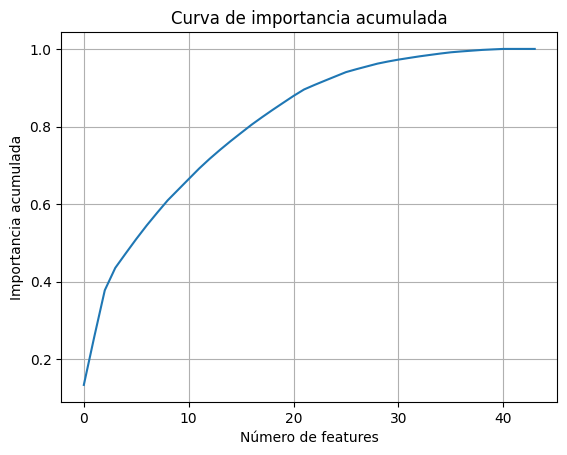

In [106]:
importances_sorted = importances.sort_values(ascending=False)
cumulative_importance = importances_sorted.cumsum()

import matplotlib.pyplot as plt
plt.plot(range(len(cumulative_importance)), cumulative_importance)
plt.xlabel("Número de features")
plt.ylabel("Importancia acumulada")
plt.title("Curva de importancia acumulada")
plt.grid()
plt.show()

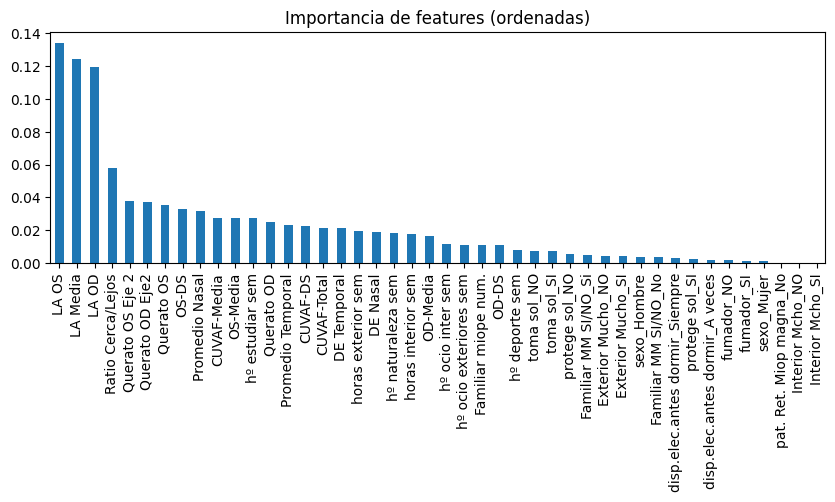

In [107]:
importances_sorted.plot(kind="bar", figsize=(10,3))
plt.title("Importancia de features (ordenadas)")
plt.show()

Se ve como a partir de las 23 features, la curva se aplana mucho y por tanto las features que se añaden simplemente aportan ruido

In [108]:
# Seleccionar las k variables más relevantes (puedes ajustar k)
k = 23
top_features = importances.head(k).index.tolist()

# Crear dataset reducido con esas variables
X_fs = X_pre[top_features].copy()
print(f"\n✅ Usando las {k} features más importantes de un total de {X_pre.shape[1]} columnas.")


✅ Usando las 23 features más importantes de un total de 44 columnas.


Volvemos a entrenar el mismo arbol con esta misma FS

In [109]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Crear el modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=9,
    n_estimators=162,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Validación cruzada externa (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1 = cross_val_score(rf_best, X_fs, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(rf_best, X_fs, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con CV externa y FS:")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final con CV externa y FS:
F1-macro medio: 0.629 ± 0.006
Accuracy medio: 0.643 ± 0.000


Se hace ahora un CV para encontrar los mejores parametros del arbol pero con la FS realizada

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir la misma rejilla de hiperparámetros que antes
param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [None, 12, 10, 8, 6],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

random_search_fs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenar la búsqueda con las features seleccionadas
random_search_fs.fit(X_fs, y_dcombo)

print("🔍 Mejores parámetros encontrados (con FS):")
print(random_search_fs.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_fs.best_score_:.3f}")

# Calcular accuracy medio con esos parámetros
from sklearn.model_selection import cross_val_score
best_params_fs = random_search_fs.best_params_
rf_tmp_fs = RandomForestClassifier(**best_params_fs, class_weight="balanced", random_state=42, n_jobs=-1)
acc_internal_fs = cross_val_score(rf_tmp_fs, X_fs, y_dcombo, cv=5, scoring='accuracy')
print(f"Accuracy medio (CV interna): {acc_internal_fs.mean():.3f} ± {acc_internal_fs.std():.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejores parámetros encontrados (con FS):
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171}
Mejor F1-macro (CV interna): 0.726
Accuracy medio (CV interna): 0.743 ± 0.132


Se entrena el arbol ahora con la FS incorporada y los mejores parametros calculados

In [111]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

rf_best_fs = RandomForestClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=171,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_f1_fs = cross_val_score(rf_best_fs, X_fs, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc_fs = cross_val_score(rf_best_fs, X_fs, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final con RE-CV externa (Feature Selection):")
print(f"F1-macro medio: {scores_f1_fs.mean():.3f} ± {scores_f1_fs.std():.3f}")
print(f"Accuracy medio: {scores_acc_fs.mean():.3f} ± {scores_acc_fs.std():.3f}")


📊 Evaluación final con RE-CV externa (Feature Selection):
F1-macro medio: 0.659 ± 0.101
Accuracy medio: 0.671 ± 0.097


###XG Boost

In [112]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_pre, y_dcombo)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.8829989973347863), 'gamma': np.float64(0.8331949117361643), 'learning_rate': np.float64(0.04467293070155442), 'max_depth': 3, 'n_estimators': 149, 'subsample': np.float64(0.8987566853061946)}
Mejor F1-macro (CV interna): 0.777


In [113]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.883,
    gamma=0.8332,
    learning_rate=0.044673,
    max_depth=3,
    n_estimators=149,
    subsample=0.89876,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_pre, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_pre, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.781 ± 0.045
Accuracy medio: 0.786 ± 0.045


In [114]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.883,
    gamma=0.8332,
    learning_rate=0.044673,
    max_depth=3,
    n_estimators=149,
    subsample=0.89876,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.795 ± 0.052
Accuracy medio: 0.800 ± 0.053


In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats import randint, uniform
import numpy as np

# Dataset con las top features seleccionadas por RF
X_fs_xgb = X_pre[top_features].copy()

# Rejilla de búsqueda para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 1)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],  # para balancear clases
    random_state=42,
    n_jobs=-1
)

# Randomized Search con CV interna
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_xgb.fit(X_fs_xgb, y_dcombo)

print("🔍 Mejores parámetros XGBoost:")
print(random_search_xgb.best_params_)
print(f"Mejor F1-macro (CV interna): {random_search_xgb.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🔍 Mejores parámetros XGBoost:
{'colsample_bytree': np.float64(0.7935133228268232), 'gamma': np.float64(0.5200680211778108), 'learning_rate': np.float64(0.11934205586865593), 'max_depth': 8, 'n_estimators': 290, 'subsample': np.float64(0.9526854323784995)}
Mejor F1-macro (CV interna): 0.797


In [116]:
best_params_xgb = random_search_xgb.best_params_

xgb_best = XGBClassifier(
    colsample_bytree=0.7935,
    gamma=0.52,
    learning_rate=0.119,
    max_depth=8,
    n_estimators=290,
    subsample=0.952,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs_xgb, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs_xgb, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.781 ± 0.041
Accuracy medio: 0.786 ± 0.045


El modelo final empleado sera el XGBoost que tiene el FS procedente del RF y cuya optimizacion ha sido la primera. Es decir, a partir de todas las features

In [117]:
xgb_best = XGBClassifier(
    colsample_bytree=0.883,
    gamma=0.8332,
    learning_rate=0.044673,
    max_depth=3,
    n_estimators=149,
    subsample=0.89876,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=y_dcombo.value_counts()[0] / y_dcombo.value_counts()[1],
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_f1 = cross_val_score(xgb_best, X_fs, y_dcombo, cv=skf, scoring='f1_macro')
scores_acc = cross_val_score(xgb_best, X_fs, y_dcombo, cv=skf, scoring='accuracy')

print("\n📊 Evaluación final (CV externa XGBoost):")
print(f"F1-macro medio: {scores_f1.mean():.3f} ± {scores_f1.std():.3f}")
print(f"Accuracy medio: {scores_acc.mean():.3f} ± {scores_acc.std():.3f}")


📊 Evaluación final (CV externa XGBoost):
F1-macro medio: 0.795 ± 0.052
Accuracy medio: 0.800 ± 0.053


In [118]:
xgb_best.fit(X_fs,y_dcombo)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.883, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.8332,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.044673,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=149, n_jobs=-1,
              num_parallel_tree=None, ...)

En este caso, solo tenemos que predecir aquellos registros en los que Combo=M

In [119]:
resultados_finales.head()

,M_pred,MM_pred,Combo_pred
0,SI,SI,MM
1,NO,NO,C
2,SI,SI,MM
3,SI,NO,M
4,NO,NO,C


##Soluciones finales

In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Filtrar los casos donde Combo = M (miopes no magnos)
mask_m = resultados_finales["Combo_pred"] == "M"

# 2️⃣ Seleccionar los datos correspondientes en X_test_final
# Asegúrate de usar las mismas features (X_fs) que usaste para entrenar el modelo
X_test_m = X_test_final.loc[mask_m, X_fs.columns].copy()

# 3️⃣ Realizar las predicciones M1/M2
le_dcombo = LabelEncoder()
le_dcombo.fit(["M1", "M2"])
dcombo_pred_m_enc = xgb_best.predict(X_test_m)
dcombo_pred_m_labels = le_dcombo.inverse_transform(dcombo_pred_m_enc)

# 4️⃣ Insertar las predicciones en el dataframe final
resultados_finales.loc[mask_m, "DCombo_pred"] = dcombo_pred_m_labels

# 5️⃣ Asignar el resto de valores según la lógica previa
resultados_finales.loc[resultados_finales["Combo_pred"] == "C", "DCombo_pred"] = "C"
resultados_finales.loc[resultados_finales["Combo_pred"] == "MM", "DCombo_pred"] = "MM"

# 6️⃣ Mostrar el resultado final
print("✅ DCombo_pred completado:")
display(resultados_finales)

✅ DCombo_pred completado:


,M_pred,MM_pred,Combo_pred,DCombo_pred
0,SI,SI,MM,MM
1,NO,NO,C,C
2,SI,SI,MM,MM
3,SI,NO,M,M1
4,NO,NO,C,C
5,SI,NO,M,M1
6,SI,NO,M,M2
7,SI,SI,MM,MM
8,NO,NO,C,C
9,SI,SI,MM,MM


In [121]:
errores_dcombo = resultados_finales[
    ((resultados_finales["Combo_pred"] == "C") & (resultados_finales["DCombo_pred"] != "C")) |
    ((resultados_finales["Combo_pred"] == "MM") & (resultados_finales["DCombo_pred"] != "MM"))
]

print(f"Casos incoherentes en DCombo_pred: {len(errores_dcombo)}")

Casos incoherentes en DCombo_pred: 0


In [122]:
# Renombrar las columnas
resultados_finales = resultados_finales.rename(columns={
    "M_pred": "M",
    "MM_pred": "MM",
    "Combo_pred": "Combo",
    "DCombo_pred": "DCombo"
})

# Verificar el cambio
display(resultados_finales.head())

# Exportar a CSV
ruta_salida = "/content/drive/MyDrive/ML/Trabajo_final/resultados_finales.csv"  # Puedes cambiar la ruta si lo deseas
resultados_finales.to_csv(ruta_salida, index=False, encoding="utf-8")

,M,MM,Combo,DCombo
0,SI,SI,MM,MM
1,NO,NO,C,C
2,SI,SI,MM,MM
3,SI,NO,M,M1
4,NO,NO,C,C
